# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv("../data/cities_temperatures.csv")
temps_df.head(5) 



,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [12]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date



In [13]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.
 # TODO: uncomment this line to complete it

def f_to_c(AvgTemperatureFahrenheit):
    celcius = (AvgTemperatureFahrenheit - 32) * 5/9
    return round(celcius, 2)

temps_df["AvgTemperatureCelsius"] = temps_df["AvgTemperatureFahrenheit"].apply(f_to_c)



temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.39
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.00
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.50
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.11
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.06
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.61
72728,US,Washington,49.6,2019-12-28,12,2019,9.78
72729,US,Washington,48.9,2019-12-29,12,2019,9.39
72730,US,Washington,55.0,2019-12-30,12,2019,12.78


In [14]:
# Ex 3.3: How many different cities are there? Provide a list of them.



unique_countries = temps_df["Country"].value_counts()  # TODO: this should be a list of unique countries

unique_countries_list = list(zip(unique_countries.index, unique_countries.values))

print(f"Number of unique countires: {len(unique_countries)}")
print("Number of cities per country:")
for country, count in unique_countries_list:
    print(f"{country}: {count}")


# TODO: print a message with the number of unique countries and the list of them

Number of unique countires: 10
Number of cities per country:
US: 7294
Japan: 7281
India: 7278
Argentina: 7277
Australia: 7277
South Africa: 7277
Egypt: 7275
Senegal: 7272
Colombia: 7264
Germany: 7237


In [17]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df["Date"].min() 
max_date = temps_df["Date"].max() 

print(f"Minimum date is: {min_date}")
print(f"Maximum date is: {max_date}")

# TODO: print a message with the min and max dates

Minimum date is: 2000-01-01
Maximum date is: 2019-12-31


In [18]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp = temps_df["AvgTemperatureCelsius"].min()  
max_temp = temps_df["AvgTemperatureCelsius"].max() 

print(min_temp)
print(max_temp)

min_temp_city = temps_df.groupby("City")["AvgTemperatureCelsius"].min()
min_temp_date = temps_df.groupby("Date")["AvgTemperatureCelsius"].min()

print(f"Min temp in each city {min_temp_city}")
print(f"Min temp and date {min_temp_date}")

max_temp_city = temps_df.groupby("City")["AvgTemperatureCelsius"].max()
max_temp_date = temps_df.groupby("Date")["AvgTemperatureCelsius"].max()

print(f" Max temp in each city {max_temp_city}")
print(f"Max temp and date is {max_temp_date}")
# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date

-16.78
37.89
Min temp in each city City
Bogota           8.17
Buenos Aires     1.83
Cairo            7.33
Calcutta        11.61
Canberra        -0.72
Capetown         7.17
Dakar           17.33
Munich         -16.78
Tokyo            1.17
Washington     -10.61
Name: AvgTemperatureCelsius, dtype: float64
Min temp and date Date
2000-01-01    0.67
2000-01-02    1.61
2000-01-03   -0.56
2000-01-04    1.89
2000-01-05    6.00
              ... 
2019-12-27    2.72
2019-12-28   -1.33
2019-12-29   -3.17
2019-12-30   -2.28
2019-12-31    1.78
Name: AvgTemperatureCelsius, Length: 7298, dtype: float64
 Max temp in each city City
Bogota          18.22
Buenos Aires    32.72
Cairo           37.89
Calcutta        35.89
Canberra        32.22
Capetown        28.78
Dakar           30.56
Munich          27.67
Tokyo           32.56
Washington      33.67
Name: AvgTemperatureCelsius, dtype: float64
Max temp and date is Date
2000-01-01    26.39
2000-01-02    26.00
2000-01-03    23.50
2000-01-04    26.11
2000-01-

In [41]:
import pandas as pd
import matplotlib as plt

data_path = "../data/cities_temperatures.csv"
temps_df = pd.read_csv(data_path)

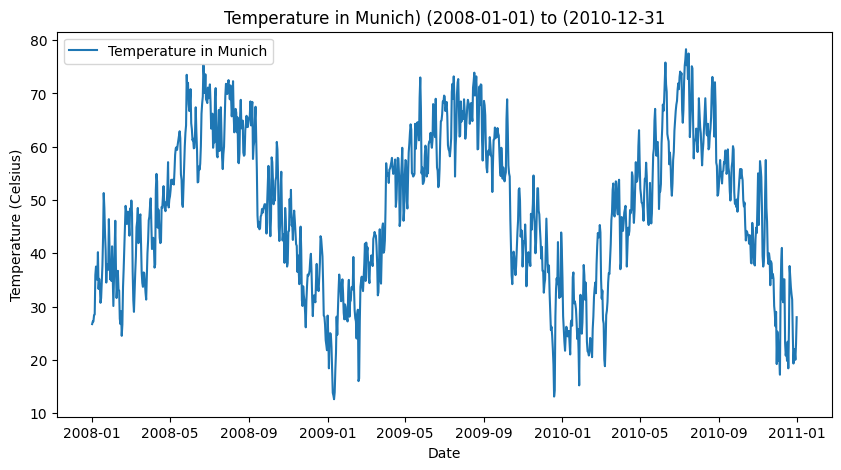

In [60]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

import pandas as pd


city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

# temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

city_df = temps_df[temps_df["City"] == city] 

city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]   # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureFahrenheit"], label=f"Temperature in {city}")
plt.title(f"Temperature in {city}) ({start_date}) to ({end_date}")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.legend()


plt.show()




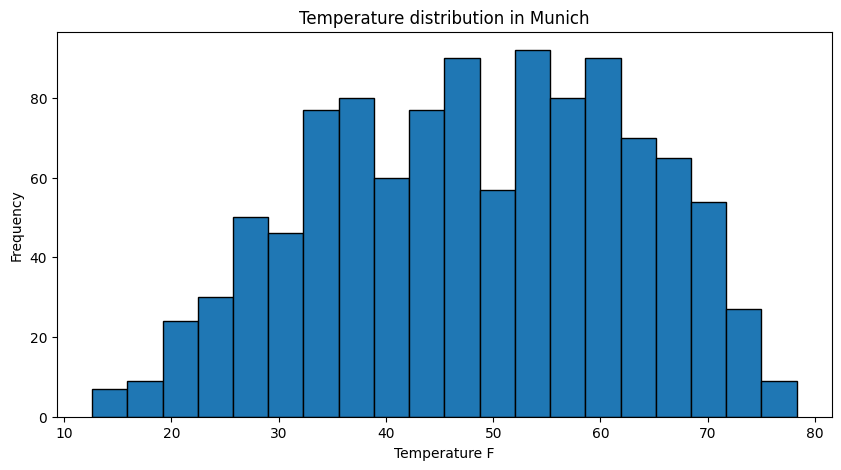

In [61]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

plt.hist(city_df_period["AvgTemperatureFahrenheit"], bins = 20, edgecolor= "black")
plt.title(f"Temperature distribution in {city}")
plt.xlabel("Temperature F")
plt.ylabel("Frequency")

plt.show()

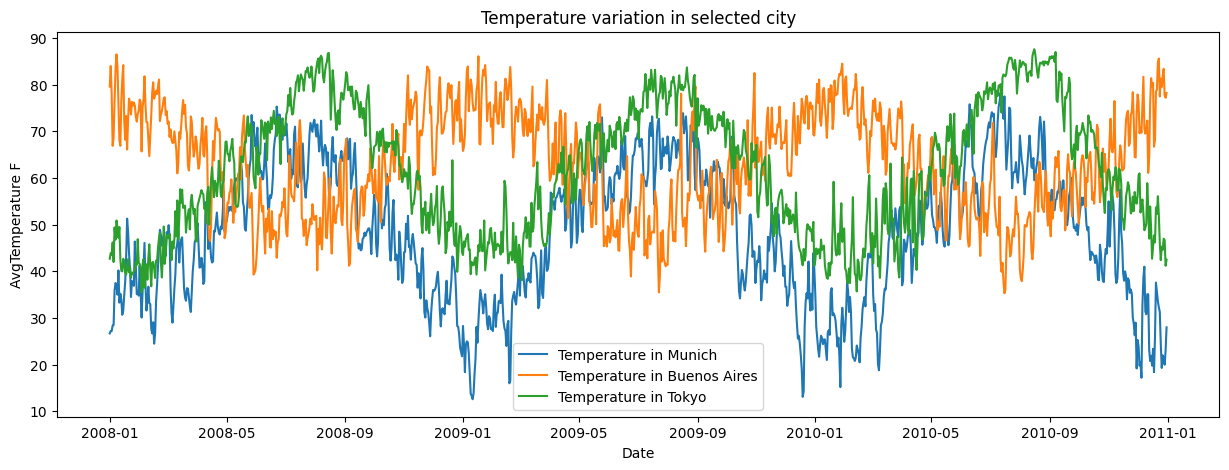

In [56]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

for city in selected_cities:
     city_df = temps_df[temps_df["City"] == city]            # TODO: get a dataframe with the rows of the selected city
     city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
     plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureFahrenheit"], label=f"Temperature in {city}")                # TODO plot each city line and use the label parameter to set the legend name for each city

plt.title("Temperature variation in selected city")
plt.xlabel("Date")
plt.ylabel("AvgTemperature F")

plt.legend()

plt.show()

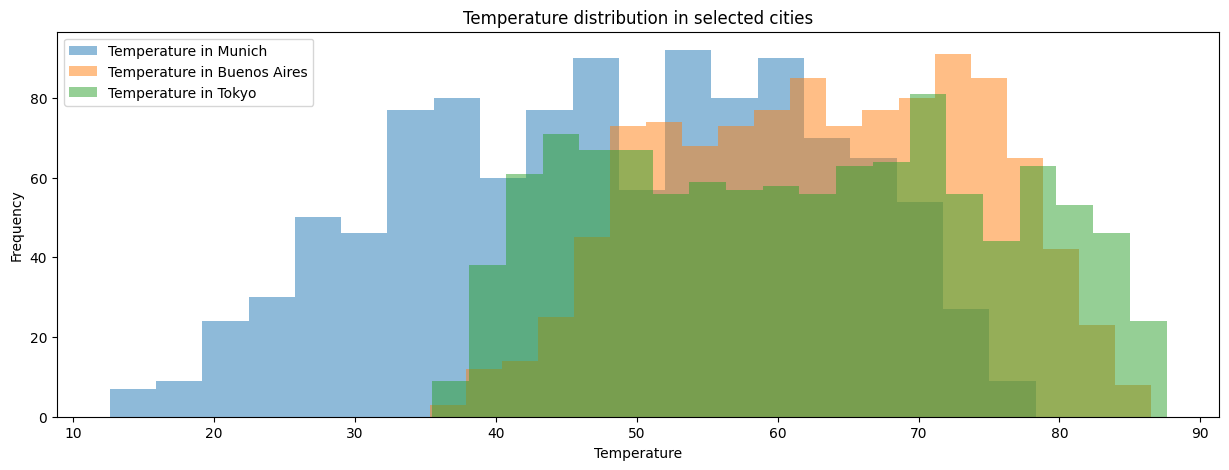

In [63]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

for city in selected_cities:
     city_df = temps_df[temps_df["City"] == city]           
     city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]
     plt.hist(city_df_period["AvgTemperatureFahrenheit"], bins = 20, alpha = 0.5, label=f"Temperature in {city}")                   

plt.title("Temperature distribution in selected cities") 
plt.xlabel("Temperature")
plt.ylabel("Frequency") 

plt.legend()

plt.show()
